In [1]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 25.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
from tqdm import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
df = pd.read_csv('spam.csv') #write your own file path
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
#check null values
df.isna().sum()

,0
Category,0
Message,0


In [7]:
df.duplicated().any()

np.True_

In [8]:
#find duplicates and drop (inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
#now it should be false
df.duplicated().any()

np.False_

Category
ham     4516
spam     641
Name: count, dtype: int64


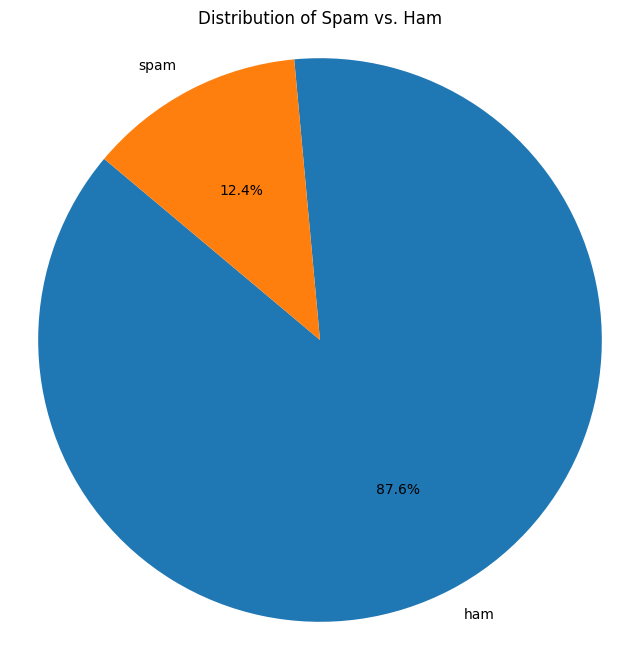

In [10]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()
print(category_counts)


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

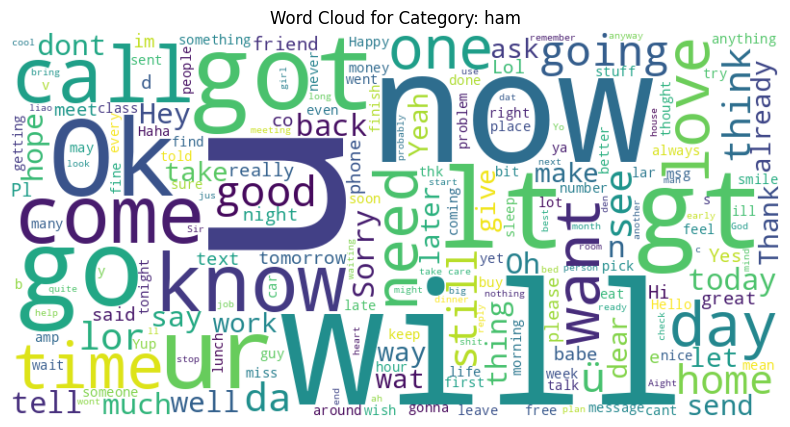

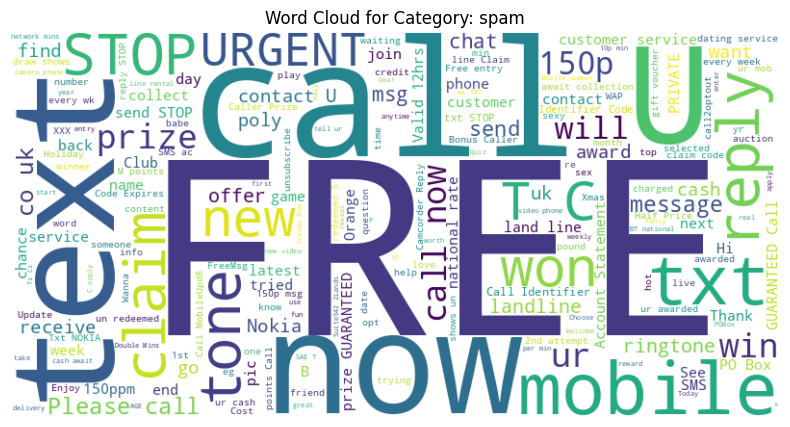

In [11]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [12]:
# encode 0 or 1 on ham and span
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [13]:
# Convert 'Message' column to lowercase
df['Message'] = df['Message'].str.lower()


In [14]:
# Remove extra white spaces from the 'Message' column
df['Message'] = df['Message'].str.strip()


In [15]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()


# Remove HTML tags from 'Message' column
df['Message'] = df['Message'].apply(remove_html_tags)


In [16]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    url_pattern = r'http\S+|www\S+|https\S+'
    return re.sub(url_pattern, '', text, flags=re.MULTILINE)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [17]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [18]:
# Function to remove numeric values from text
def remove_numeric(text):
    pattern = r'\d+'
    return re.sub(pattern, '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

In [19]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [20]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [21]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    replaced_words = [chat_words.get(word.upper(), word) for word in words]
    return ' '.join(replaced_words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [22]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [24]:
# Initialize the Porter Stemmer
# conver the word in its root form
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif oni,ok lar joke wif oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,dun say early hor c already say,dun say earli hor c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [25]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category'].to_numpy()
len(df.iloc[0]['Message_stemmed'].split())

16

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [27]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4125, 7053)
(4125,)
(1032, 7053)
(1032,)


In [28]:
m = X_train.shape[0] #num of data points
n = X_train.shape[1] #num of features

In [36]:
class NaiveBayesScratch:
    def fit(self, X_train, y_train, lambda_=1e-6):
        self.classes = np.unique(y_train)
        self.mean = {}
        self.var = {}
        self.priors = {}
        self.lambda_ = lambda_

        for c in self.classes:
            X_c = X_train[y_train == c]
            self.mean[c] = X_c.mean(axis=0)
            # variance smoothing with lambda_
            self.var[c] = X_c.var(axis=0) + self.lambda_
            self.priors[c] = X_c.shape[0] / X_train.shape[0]

    def _gaussian_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])


### 1. Train logistic regression using your implementation with de-fault hyperparameters

/tmp/ipython-input-1067417915.py:25: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))


Naive Bayes (Scratch, No Scaling) Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       896
           1       0.47      0.44      0.45       136

    accuracy                           0.86      1032
   macro avg       0.69      0.68      0.69      1032
weighted avg       0.86      0.86      0.86      1032



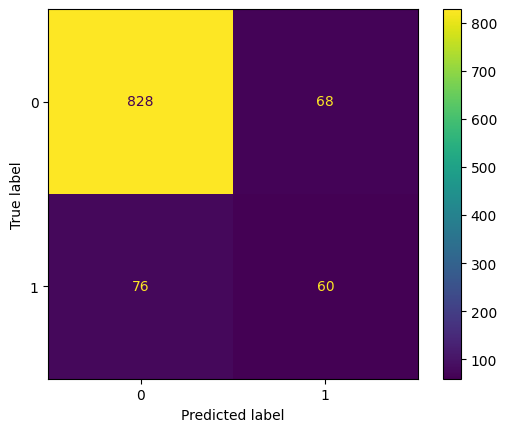

In [33]:
nb_scratch = NaiveBayesScratch()
nb_scratch.fit(X_train, y_train)
y_pred_nb = nb_scratch.predict(X_test)

print("Naive Bayes (Scratch, No Scaling) Report:")
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### 2. Apply feature scaling so that all features have zero mean and unit variance.


/tmp/ipython-input-1067417915.py:25: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))


Naive Bayes (Scratch, With Scaling) Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       896
           1       0.47      0.44      0.45       136

    accuracy                           0.86      1032
   macro avg       0.69      0.68      0.69      1032
weighted avg       0.86      0.86      0.86      1032



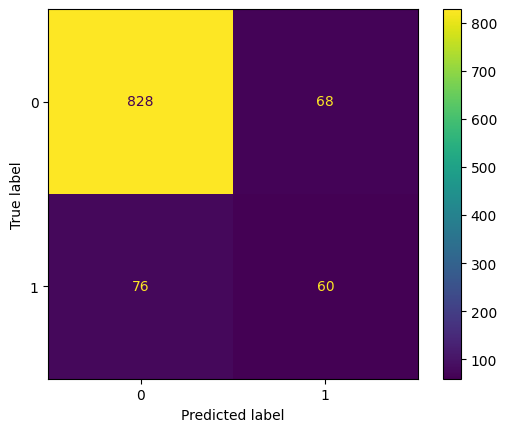

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_norm_train = scaler.transform(X_train)
X_norm_test = scaler.transform(X_test)

nb_scratch_scaled = NaiveBayesScratch()
nb_scratch_scaled.fit(X_norm_train, y_train)
y_pred_nb_scaled = nb_scratch_scaled.predict(X_norm_test)

print("Naive Bayes (Scratch, With Scaling) Report:")
print(classification_report(y_test, y_pred_nb_scaled))

cm = confusion_matrix(y_test, y_pred_nb_scaled)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#### Default vs Scaling

Naive Bayes (Scikit-learn, No Scaling) Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       896
           1       0.50      0.89      0.64       136

    accuracy                           0.87      1032
   macro avg       0.74      0.88      0.78      1032
weighted avg       0.92      0.87      0.88      1032



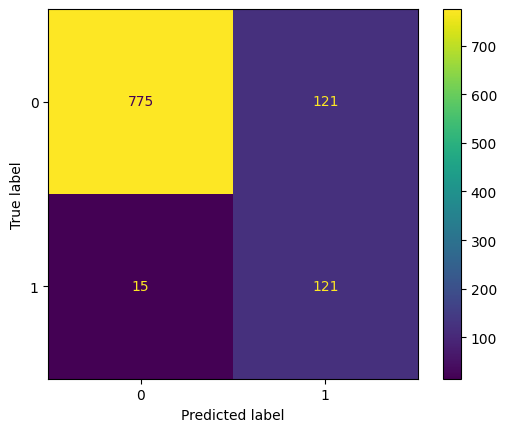

Naive Bayes (Scikit-learn, With Scaling) Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       896
           1       0.46      0.79      0.58       136

    accuracy                           0.85      1032
   macro avg       0.71      0.82      0.75      1032
weighted avg       0.90      0.85      0.87      1032



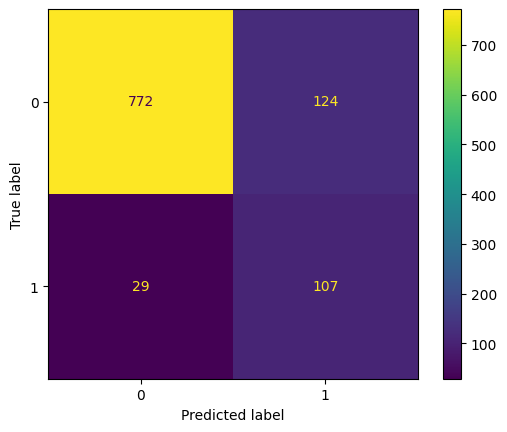

In [35]:
from sklearn.naive_bayes import GaussianNB

# ---- No Scaling ----
nb_sklearn = GaussianNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn = nb_sklearn.predict(X_test)

print("Naive Bayes (Scikit-learn, No Scaling) Report:")
print(classification_report(y_test, y_pred_sklearn))

cm = confusion_matrix(y_test, y_pred_sklearn)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# ---- With Scaling ----
nb_sklearn_scaled = GaussianNB()
nb_sklearn_scaled.fit(X_norm_train, y_train)
y_pred_sklearn_scaled = nb_sklearn_scaled.predict(X_norm_test)

print("Naive Bayes (Scikit-learn, With Scaling) Report:")
print(classification_report(y_test, y_pred_sklearn_scaled))

cm = confusion_matrix(y_test, y_pred_sklearn_scaled)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### 3. Using L2 regularization
1. using lambda_ = 0.1
2. using lambda_ = 0.5
3. using lambda_ = 1

/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))



Naive Bayes (Scratch, λ=0.1) Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       896
           1       0.33      0.71      0.45       136

    accuracy                           0.77      1032
   macro avg       0.64      0.75      0.66      1032
weighted avg       0.87      0.77      0.80      1032



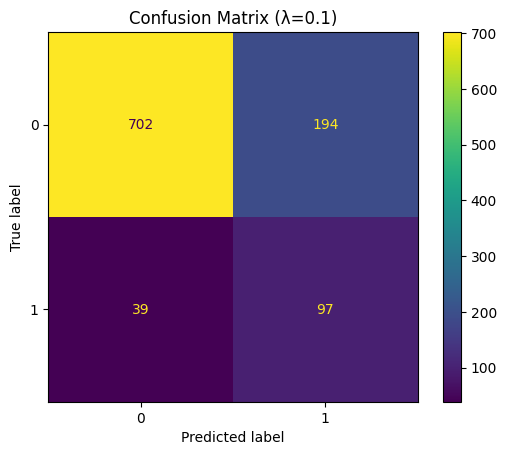

/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))



Naive Bayes (Scratch, λ=0.5) Report:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70       896
           1       0.21      0.75      0.32       136

    accuracy                           0.59      1032
   macro avg       0.57      0.66      0.51      1032
weighted avg       0.84      0.59      0.65      1032



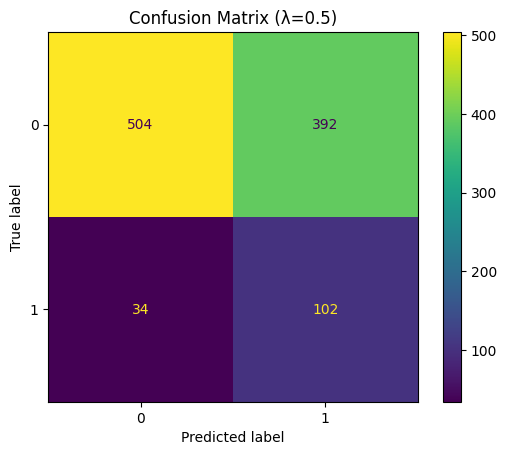

/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))



Naive Bayes (Scratch, λ=1.0) Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       896
           1       0.19      0.81      0.30       136

    accuracy                           0.51      1032
   macro avg       0.56      0.64      0.47      1032
weighted avg       0.84      0.51      0.58      1032



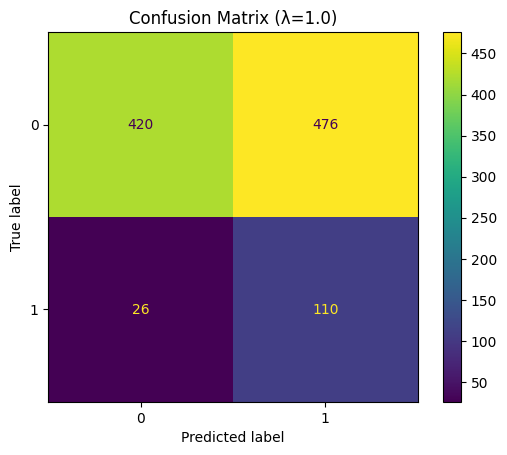

In [37]:
class NaiveBayesScratch:
    def fit(self, X_train, y_train, lambda_=1e-6):
        self.classes = np.unique(y_train)
        self.mean = {}
        self.var = {}
        self.priors = {}
        self.lambda_ = lambda_

        for c in self.classes:
            X_c = X_train[y_train == c]
            self.mean[c] = X_c.mean(axis=0)
            # variance smoothing with lambda_
            self.var[c] = X_c.var(axis=0) + self.lambda_
            self.priors[c] = X_c.shape[0] / X_train.shape[0]

    def _gaussian_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])



for lam in [0.1, 0.5, 1.0]:
    nb_scratch = NaiveBayesScratch()
    nb_scratch.fit(X_norm_train, y_train, lambda_=lam)
    y_pred_nb = nb_scratch.predict(X_norm_test)

    print(f"\nNaive Bayes (Scratch, λ={lam}) Report:")
    print(classification_report(y_test, y_pred_nb))

    cm = confusion_matrix(y_test, y_pred_nb)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix (λ={lam})")
    plt.show()

### 4. Plot Loss vs Epoch curve

/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))
/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))
/tmp/ipython-input-2621582123.py:27: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(c, x)))


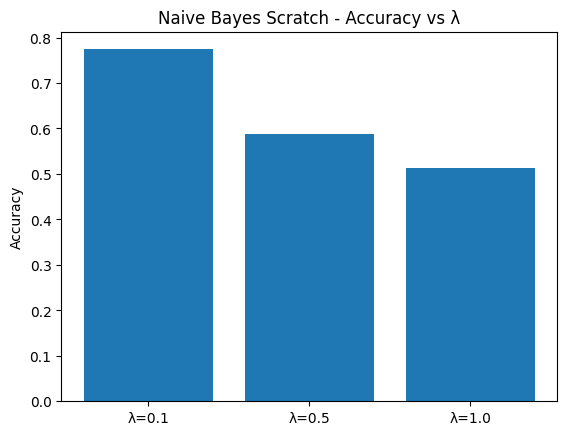

In [38]:
from sklearn.metrics import accuracy_score

results = {}

for lam in [0.1, 0.5, 1.0]:
    nb_scratch = NaiveBayesScratch()
    nb_scratch.fit(X_norm_train, y_train, lambda_=lam)
    y_pred_nb = nb_scratch.predict(X_norm_test)
    acc = accuracy_score(y_test, y_pred_nb)
    results[f"λ={lam}"] = acc

plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Naive Bayes Scratch - Accuracy vs λ")
plt.show()
